Packages

In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

Data Load

In [4]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


visualise the model

<Axes: xlabel='wt', ylabel='mpg'>

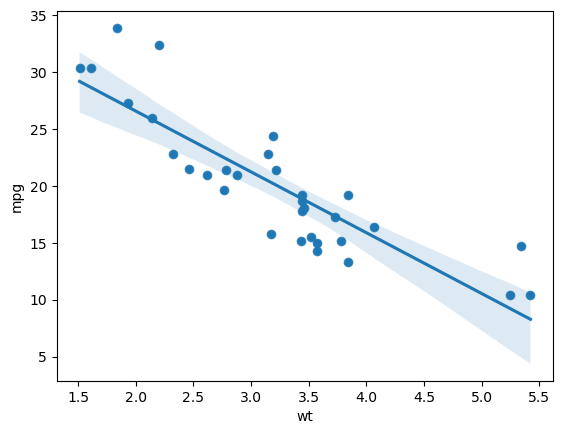

In [5]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

convert data to tensor

In [6]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

Model

In [94]:
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

In [103]:
input_dim=1
output_dim=1
model=LinearRegressionTorch(input_size=input_dim, output_size=output_dim)
model.train()
loss_fn=nn.MSELoss()
LR=0.02

Optimizer

In [104]:
optimizer=torch.optim.SGD(model.parameters(), lr=LR)

1.without batches

In [105]:
losses, slope, bias = [], [], []
NUM_EPOCHS = 1000
BATCH_SIZE = 2
for epoch in range (NUM_EPOCHS):
    # set gradients to zero
    optimizer.zero_grad()
    # forward pass
    y_pred=model(X)
    # calculate loss
    loss=loss_fn(y_pred, y_true)
    loss.backward()
    # update parameters
    optimizer.step()
    losses.append(loss.data.item())
    slope.append(model.linear.weight.item())
    bias.append(model.linear.bias.item())
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 0, Loss: 579.09521484375
Epoch 100, Loss: 67.71733093261719
Epoch 200, Loss: 40.798397064208984
Epoch 300, Loss: 26.157207489013672
Epoch 400, Loss: 18.193843841552734
Epoch 500, Loss: 13.862591743469238
Epoch 600, Loss: 11.50682258605957
Epoch 700, Loss: 10.225518226623535
Epoch 800, Loss: 9.528620719909668
Epoch 900, Loss: 9.149574279785156


2.With Batches

In [106]:
losses, slope, bias = [], [], []
NUM_EPOCHS = 1000
BATCH_SIZE = 2
for epoch in range (NUM_EPOCHS):
    for i in range(0, X.shape[0], BATCH_SIZE):
        
        # set gradients to zero
        optimizer.zero_grad()
        # forward pass
        y_pred=model(X[i:i+BATCH_SIZE])
        # calculate loss
        loss=loss_fn(y_pred,y_true[i:i+BATCH_SIZE])
        
        loss.backward()
        # update parameters
        optimizer.step()
    
    slope.append(model.linear.weight.item())
    bias.append(model.linear.bias.item())
    # if (epoch % 100 == 0):
    #     print(f"Epoch {epoch}, Loss: {loss.data}")
    losses.append(loss.item())
     # Debugging: print loss and parameter values every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
        print(f"Slope: {model.linear.weight.item()}, Bias: {model.linear.bias.item()}")
        for param in model.parameters():
            print(f"Gradient for parameter: {param.grad}")

Epoch 0, Loss: 1.8574483394622803
Slope: -5.323736190795898, Bias: 35.460086822509766
Gradient for parameter: tensor([[5.6291]])
Gradient for parameter: tensor([1.4889])
Epoch 100, Loss: 1.4151467084884644
Slope: -5.717069149017334, Bias: 36.67661666870117
Gradient for parameter: tensor([[5.0428]])
Gradient for parameter: tensor([1.3440])
Epoch 200, Loss: 1.4094799757003784
Slope: -5.722490310668945, Bias: 36.69338607788086
Gradient for parameter: tensor([[5.0347]])
Gradient for parameter: tensor([1.3421])
Epoch 300, Loss: 1.409427285194397
Slope: -5.722538948059082, Bias: 36.69353485107422
Gradient for parameter: tensor([[5.0346]])
Gradient for parameter: tensor([1.3420])
Epoch 400, Loss: 1.409427285194397
Slope: -5.722538948059082, Bias: 36.69353485107422
Gradient for parameter: tensor([[5.0346]])
Gradient for parameter: tensor([1.3420])
Epoch 500, Loss: 1.409427285194397
Slope: -5.722538948059082, Bias: 36.69353485107422
Gradient for parameter: tensor([[5.0346]])
Gradient for parame

visualise model training

<Axes: >

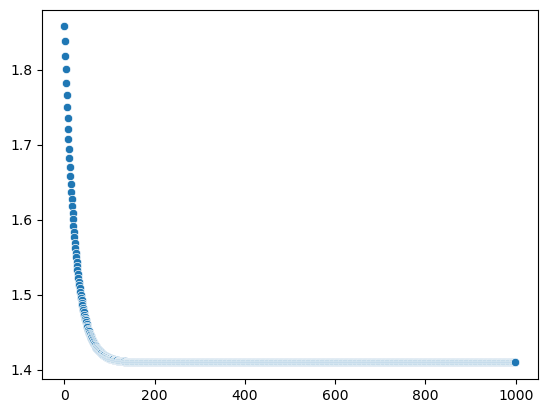

In [108]:
# sns.scatterplot(x=range(NUM_EPOCHS), y=losses)
sns.scatterplot(x=range(len(losses)), y=losses)

visualise the bias development

<Axes: >

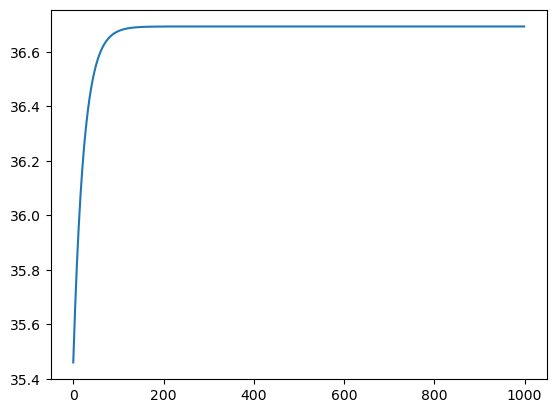

In [109]:
sns.lineplot(x=range(NUM_EPOCHS), y=bias)

visualise the slope development

<Axes: >

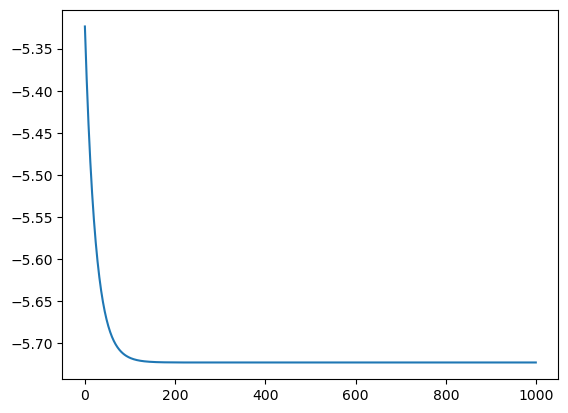

In [110]:
sns.lineplot(x=range(NUM_EPOCHS), y=slope)

check the result

In [111]:
model.eval()
y_pred=model(X).data.numpy().reshape(-1)

<Axes: >

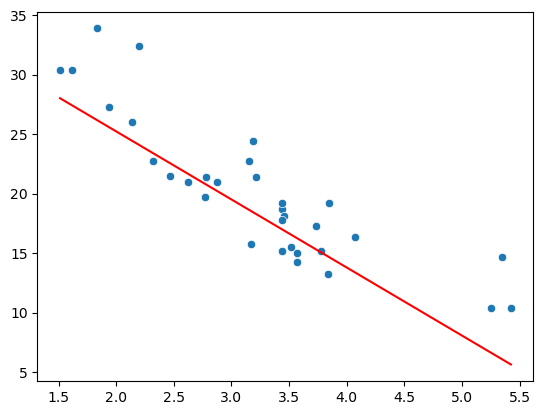

In [112]:
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')